## Observations

* Chart 4.1: Compute units exhibit greater volatility than fees. This aligns with expectations, as transaction volume and complexity can fluctuate more significantly than the fixed base fee structure.

* Chart 4.2: Approximately 70% of transactions are vote transactions, and 30% are non-vote transactions. This distribution is anticipated, given that each validator vote is recorded as a transaction.

* Chart 4.3: Fee trends closely mirror those of non-vote transactions. This is consistent with Solana's design, where only non-vote transactions can include optional priority (tip) fees to compete during congestion.

* Chart 4.4: Compute usage correlates with vote transaction volume. This is due to the substantial number of vote transactions, each requiring compute resources for signature verification.

### Conclusion:

Fees are predominantly influenced by non-vote transactions, while compute pressure is largely driven by vote transactions. Despite both transaction types generating compute load, vote transactions impose a more significant load due to the volumne of transactions and compute-intensive nature of signature verification. Fees will not be influenced by vote transactions, as only non-vote transactions have the option for priority fees.


In [1]:
from clickhouse_driver import Client
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv(override=True)

True

In [2]:
db = Client(
    host=os.getenv('CLICKHOUSE_HOST'),
    port=int(os.getenv('CLICKHOUSE_PORT')),
    user=os.getenv('CLICKHOUSE_USER'),
    password=os.getenv('CLICKHOUSE_PASSWORD')
)

## 4.1 Total Fees vs Compute

In [3]:
fees_compute_per_slot = db.execute('SELECT block_id, total_compute, total_fees  FROM solana.block_metrics')
df_fees_compute_per_slot = pd.DataFrame(fees_compute_per_slot, columns=['block_id', 'total_compute', 'total_fees'])

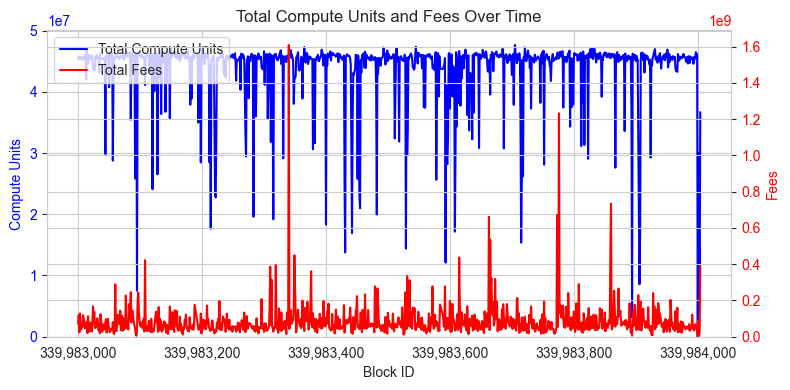

In [4]:

# Set the style
sns.set_style("whitegrid")

# Create figure and axis with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()  # Create a second y-axis

# Plot compute units on the first y-axis - removed label here
line1 = sns.lineplot(
    data=df_fees_compute_per_slot,
    x='block_id',
    y='total_compute',
    ax=ax1,
    color='blue',
    errorbar=None
)

# Plot fees on the second y-axis - removed label here
line2 = sns.lineplot(
    data=df_fees_compute_per_slot,
    x='block_id',
    y='total_fees',
    ax=ax2,
    color='red',
    errorbar=None
)

# Customize the plot
ax1.set_xlabel('Block ID')
ax1.set_ylabel('Compute Units', color='blue')
ax2.set_ylabel('Fees', color='red')

# Format x-axis to show full block_id values
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Rotate x-axis labels and adjust alignment
plt.xticks(rotation=45, ha='right')

# Add title
plt.title('Total Compute Units and Fees Over Time')

# Set y-axes to start from 0
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Color the y-axis labels to match their respective lines
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Create a single legend manually
lines = [line1.lines[0], line2.lines[0]]
labels = ['Total Compute Units', 'Total Fees']
ax1.legend(lines, labels, loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 4.2 Vote vs Non-vote Transactions

In [5]:
vote_and_non_vote_transactions_per_slot = db.execute('SELECT block_id, total_vote_txns, total_non_vote_txns  FROM solana.block_metrics order by block_timestamp')
df_vote_and_non_vote_transactions_per_slot = pd.DataFrame(vote_and_non_vote_transactions_per_slot, columns=['block_id', 'total_vote_txns', 'total_non_vote_txns'])

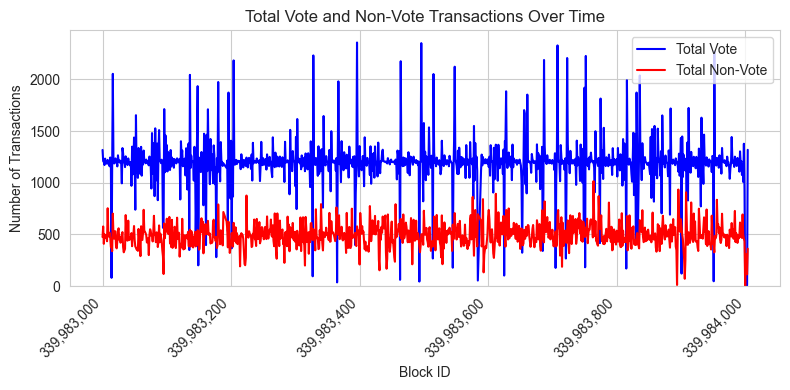

In [6]:
# Set the style
sns.set_style("whitegrid")

# Create figure and axis with single y-axis
fig, ax = plt.subplots(figsize=(8, 4))

# Plot both lines on the same y-axis
line1 = sns.lineplot(
    data=df_vote_and_non_vote_transactions_per_slot,
    x='block_id',
    y='total_vote_txns',
    ax=ax,
    color='blue',
    label='Total Vote',
    errorbar=None
)

line2 = sns.lineplot(
    data=df_vote_and_non_vote_transactions_per_slot,
    x='block_id',
    y='total_non_vote_txns',
    ax=ax,
    color='red',
    label='Total Non-Vote',
    errorbar=None
)

# Customize the plot
ax.set_xlabel('Block ID')
ax.set_ylabel('Number of Transactions')

# Format x-axis to show full block_id values
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Rotate x-axis labels and adjust alignment
plt.xticks(rotation=45, ha='right')

# Add title
plt.title('Total Vote and Non-Vote Transactions Over Time')

# Set y-axis to start from 0
ax.set_ylim(bottom=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 4.3: Transactions vs Total Fees

In [7]:
transactions_fees = db.execute('SELECT block_id, total_vote_txns, total_non_vote_txns, total_fees FROM solana.block_metrics')
df_transactions_fees = pd.DataFrame(transactions_fees, columns=['block_id', 'total_vote_txns', 'total_non_vote_txns', 'total_fees'])

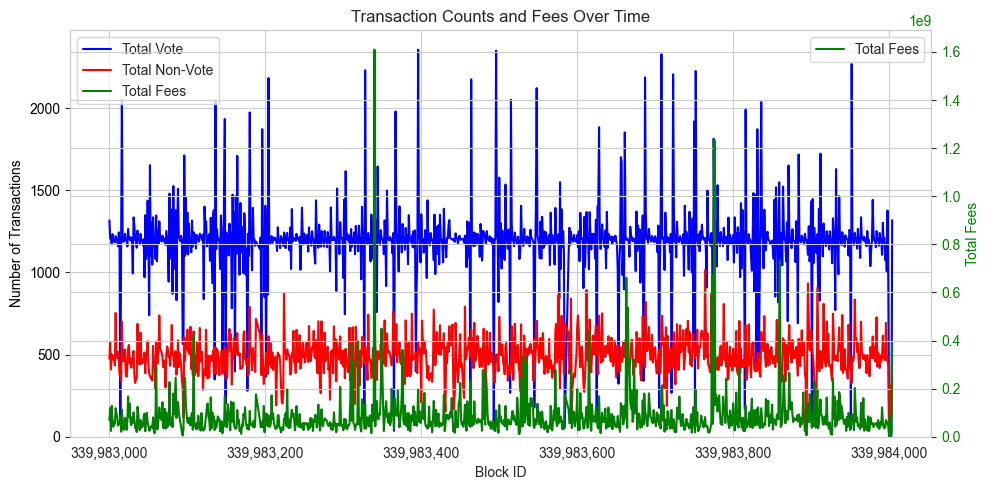

In [8]:
# Set the style
sns.set_style("whitegrid")

# Create figure and axis with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))  # Made figure slightly larger to accommodate second axis
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

# Plot transaction counts on the first y-axis
line1 = sns.lineplot(
    data=df_transactions_fees,
    x='block_id',
    y='total_vote_txns',
    ax=ax1,
    color='blue',
    label='Total Vote',
    errorbar=None
)

line2 = sns.lineplot(
    data=df_transactions_fees,
    x='block_id',
    y='total_non_vote_txns',
    ax=ax1,
    color='red',
    label='Total Non-Vote',
    errorbar=None
)

# Plot fees on the second y-axis
line3 = sns.lineplot(
    data=df_transactions_fees,
    x='block_id',
    y='total_fees',
    ax=ax2,
    color='green',
    label='Total Fees',
    errorbar=None
)

# Customize the first y-axis (transaction counts)
ax1.set_xlabel('Block ID')
ax1.set_ylabel('Number of Transactions', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(bottom=0)

# Customize the second y-axis (fees)
ax2.set_ylabel('Total Fees', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(bottom=0)

# Format x-axis to show full block_id values
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Rotate x-axis labels and adjust alignment
plt.xticks(rotation=45, ha='right')

# Add title
plt.title('Transaction Counts and Fees Over Time')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 4.4: Transactions vs Total Compute Units

In [9]:
transactions_compute_units = db.execute('SELECT block_id, total_vote_txns, total_non_vote_txns, total_compute FROM solana.block_metrics')
df_transactions_compute_units = pd.DataFrame(transactions_compute_units, columns=['block_id', 'total_vote_txns', 'total_non_vote_txns', 'total_compute'])

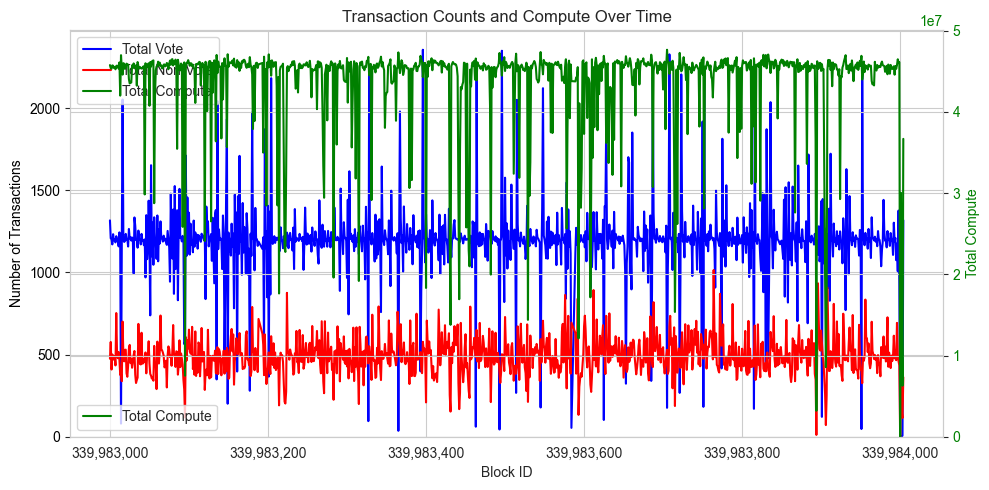

In [10]:
# Set the style
sns.set_style("whitegrid")

# Create figure and axis with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))  # Made figure slightly larger to accommodate second axis
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

# Plot transaction counts on the first y-axis
line1 = sns.lineplot(
    data=df_transactions_compute_units,
    x='block_id',
    y='total_vote_txns',
    ax=ax1,
    color='blue',
    label='Total Vote',
    errorbar=None
)

line2 = sns.lineplot(
    data=df_transactions_compute_units,
    x='block_id',
    y='total_non_vote_txns',
    ax=ax1,
    color='red',
    label='Total Non-Vote',
    errorbar=None
)

# Plot fees on the second y-axis
line3 = sns.lineplot(
    data=df_transactions_compute_units,
    x='block_id',
    y='total_compute',
    ax=ax2,
    color='green',
    label='Total Compute',
    errorbar=None
)

# Customize the first y-axis (transaction counts)
ax1.set_xlabel('Block ID')
ax1.set_ylabel('Number of Transactions', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(bottom=0)

# Customize the second y-axis (fees)
ax2.set_ylabel('Total Compute', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(bottom=0)

# Format x-axis to show full block_id values
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Rotate x-axis labels and adjust alignment
plt.xticks(rotation=45, ha='right')

# Add title
plt.title('Transaction Counts and Compute Over Time')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()